In [2]:
import sys
sys.path.append('../')

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import config

In [10]:
df = pd.read_csv(config.DATA_FILE_NAME)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [13]:
df = df.drop(["client_id", "home_address", "work_address", "app_date"], axis=1)
df = df.dropna()

In [14]:
df.describe()

,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,41099.775417,1.733330,2.765458,0.126994
std,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,46166.322400,1.123622,1.009463,0.332968
min,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1000.000000,1.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,20000.000000,1.000000,2.000000,0.000000
50%,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,30000.000000,1.000000,3.000000,0.000000
75%,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,48000.000000,2.000000,4.000000,0.000000
max,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,1000000.000000,4.000000,4.000000,1.000000


In [15]:
df.describe(include="object")

,education,sex,car,car_type,foreign_passport
count,73492,73799,73799,73799,73799
unique,5,2,2,2,2
top,SCH,F,N,N,N
freq,38860,41562,49832,59791,62733


# Visualization

## Target

Text(0, 0.5, 'Normalize count')

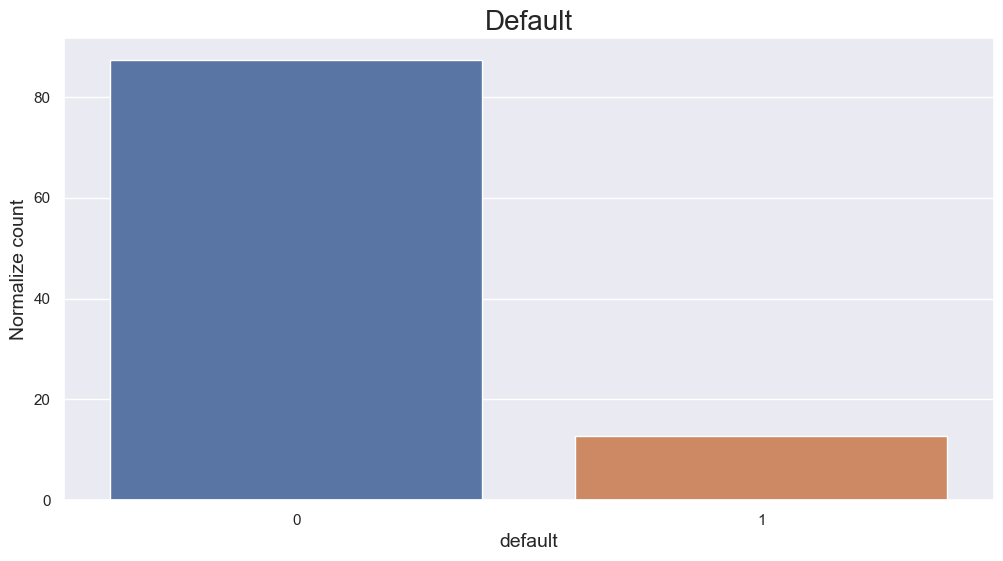

In [17]:
norm_target = (df["default"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='index', y='percent', data=norm_target)

plt.title("Default", fontsize=20)
plt.xlabel("default", fontsize=14)
plt.ylabel("Normalize count", fontsize=14);

## Age

Text(7.515850694444454, 0.5, 'Density')

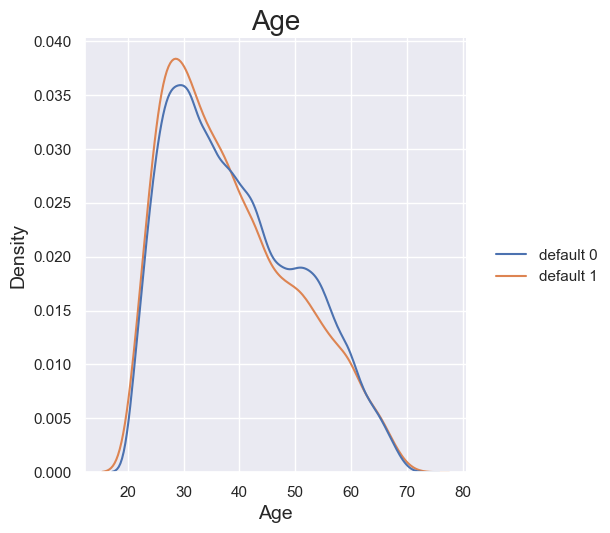

In [18]:
sns.displot(
    {
        "default 0": df[df["default"] == 0]["age"], 
        "default 1": df[df["default"] == 1]["age"]
    },
    kind="kde", 
    common_norm=False
)

plt.title("Age", fontsize=20)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14);

## Education

Text(0.5, 0, 'default')

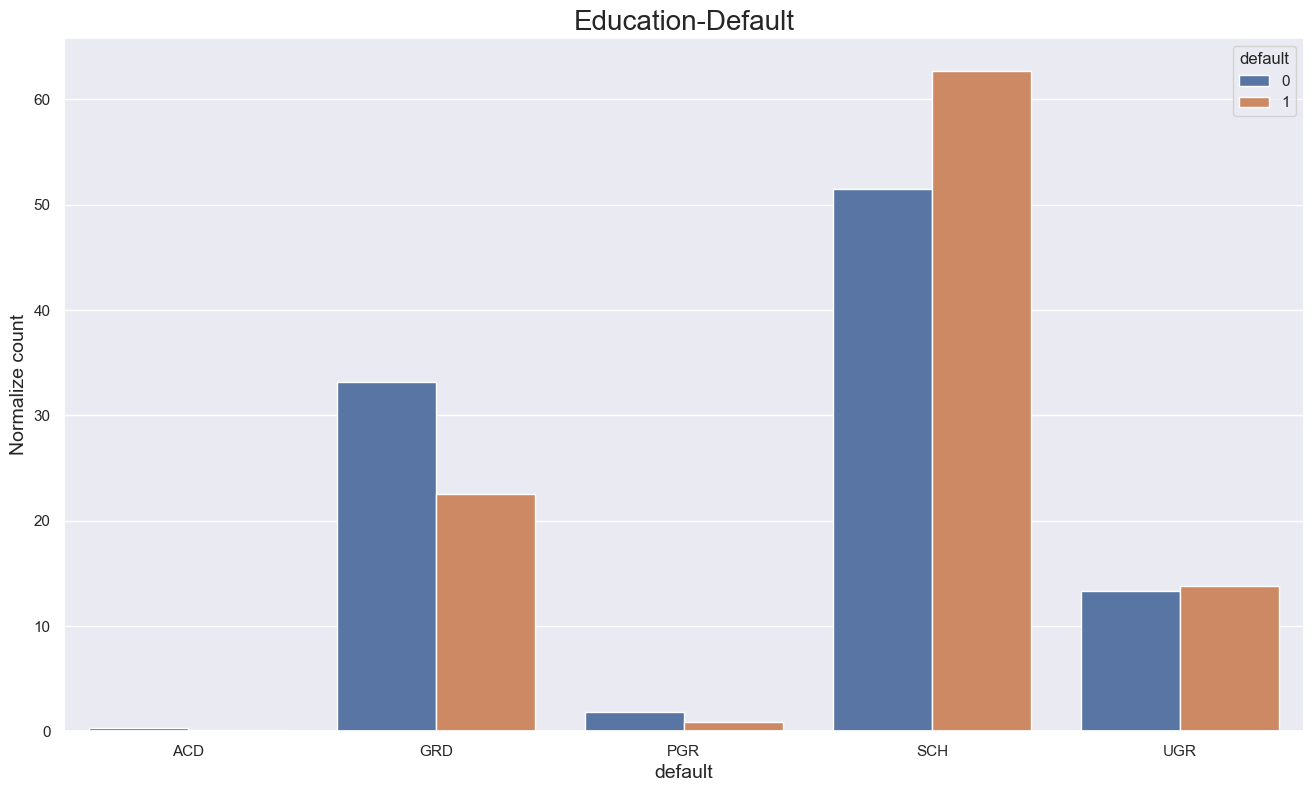

In [23]:
educ_def = (df.groupby(df["default"])["education"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index()
              .sort_values("education"))
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="education", y="percent", hue="default", data=educ_def)

plt.title("Education-Default", fontsize=20)
plt.ylabel("Normalize count", fontsize=14)
plt.xlabel("default", fontsize=14);

## Correlation

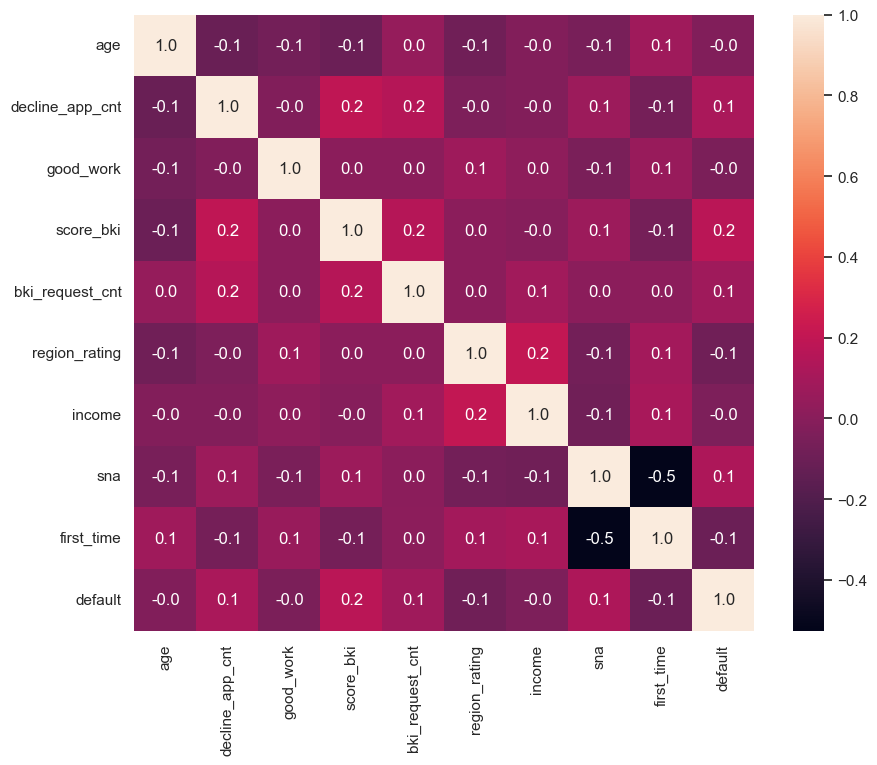

In [25]:
num_cols = ["age", "decline_app_cnt", "good_work", "score_bki", "bki_request_cnt", 
    "region_rating", "income", "sna", "first_time", "default"]

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".1f");